# COVID-19 Case Analysis using Pandas

In [87]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns             #using both matplotlib and seaborn for visualization
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #To ignore warnings

In [88]:
#Importing Data
path = 'https://data.ontario.ca/dataset/5472ffc1-88e2-48ca-bc9f-4aa249c1298d/resource/66d15cce-bfee-4f91-9e6e-0ea79ec52b3d/download/ongoing_outbreaks.csv'
df = pd.read_csv(path)



In [89]:
#Overview of the Dataset
df.head()


,date,outbreak_group,outbreak_subgroup,number_ongoing_outbreaks
0,2020-11-01,1 Congregate Care,1 Long-Term Care Homes,73
1,2020-11-01,1 Congregate Care,2 Hospitals,21
2,2020-11-01,1 Congregate Care,3 Retirement Homes,51
3,2020-11-01,2 Congregate Living,18 Short-term accommodations,2
4,2020-11-01,2 Congregate Living,4 Group Home/Supportive Housing,31


In [90]:
#Info gives the idea of the structure of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      8923 non-null   object
 1   outbreak_group            8923 non-null   object
 2   outbreak_subgroup         8923 non-null   object
 3   number_ongoing_outbreaks  8923 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 279.0+ KB


In [91]:
#Checking if there is any null values in the dataset.
df.isnull().sum()

date                        0
outbreak_group              0
outbreak_subgroup           0
number_ongoing_outbreaks    0
dtype: int64

In [92]:
#These are different groups where COivd-19 cases outbreaked.  
df['outbreak_group'].unique()

array(['1 Congregate Care', '2 Congregate Living', '3 Education',
       '4 Workplace', '5 Recreational', '6 Other/Unknown',
       '7 Out of Province Outbreak'], dtype=object)

In [93]:
#These are different sub-groups where COivd-19 cases outbreaked.
df['outbreak_subgroup'].unique()

array(['1 Long-Term Care Homes', '2 Hospitals', '3 Retirement Homes',
       '18 Short-term accommodations', '4 Group Home/Supportive Housing',
       '5 Correctional Facility', '6 Shelter',
       '10 School - Post-Secondary', '11 Child care',
       '7 School - Elementary', '8 School - Secondary',
       '9 School - Elementary/Secondary', '12 Workplace - Farm',
       '13 Workplace - Food Processing', '14 Workplace - Other',
       '15 Retail', '16 Medical/Health Service',
       '17 Bar/restaurant/nightclub', '19 Recreational fitness',
       '21 Other recreation', '23 Other', '24 Unknown',
       '22 Congregate other', '20 Personal service settings',
       '25 Out of Province Outbreak', '26 Camp - Day',
       '27 Camp - Overnight', '28 Camp - Unspecified'], dtype=object)

In [94]:
#Creating new Year and Month column 
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [95]:
df.head()

,date,outbreak_group,outbreak_subgroup,number_ongoing_outbreaks,year,month
0,2020-11-01,1 Congregate Care,1 Long-Term Care Homes,73,2020,11
1,2020-11-01,1 Congregate Care,2 Hospitals,21,2020,11
2,2020-11-01,1 Congregate Care,3 Retirement Homes,51,2020,11
3,2020-11-01,2 Congregate Living,18 Short-term accommodations,2,2020,11
4,2020-11-01,2 Congregate Living,4 Group Home/Supportive Housing,31,2020,11


# Analysis Part

## Insight-1 - Finding the Maximum and Minimum no of ongoing outbreaks in different Groups.

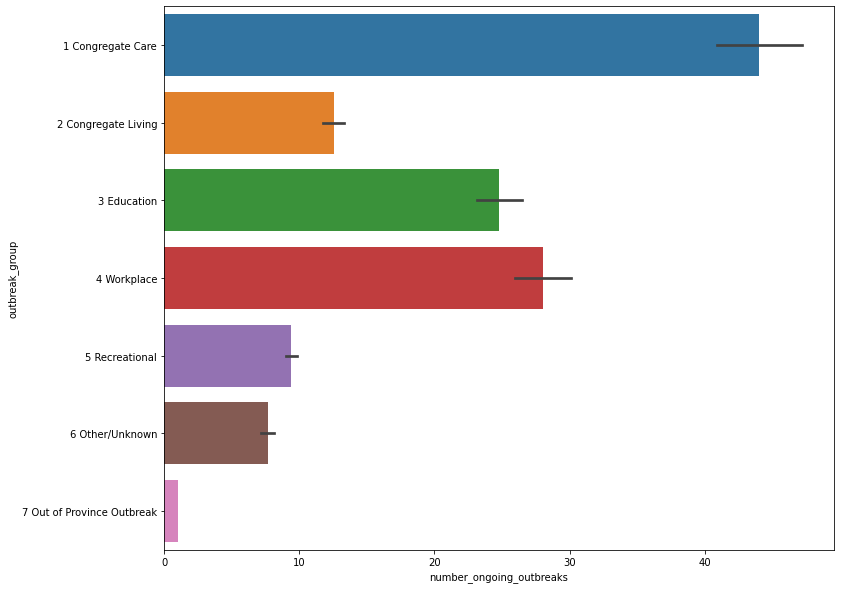

In [96]:
plt.figure(figsize=(12,10))
plot = sns.barplot(df['number_ongoing_outbreaks'], df['outbreak_group'])

## Insight-2 - Finding the Maximum and Minimum no of ongoing outbreaks in different Sub-Groups

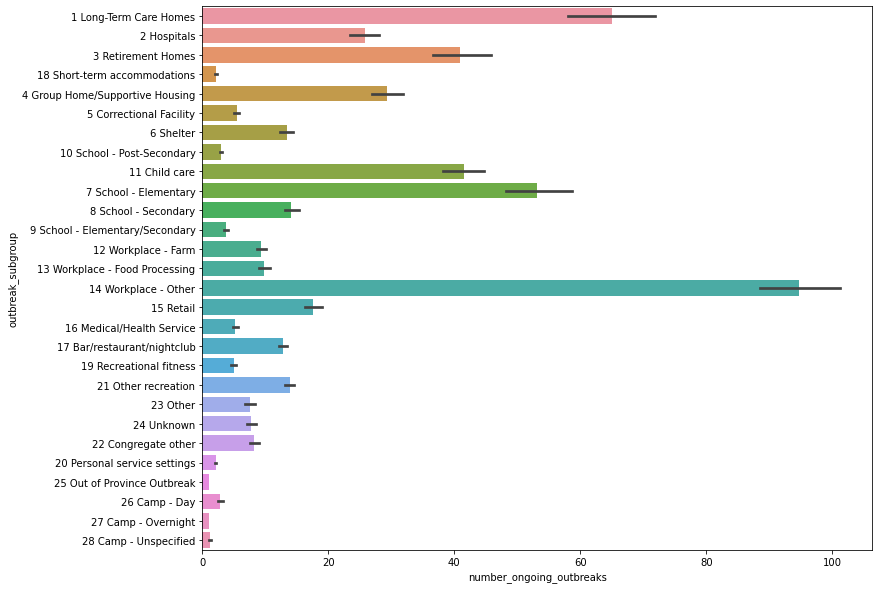

In [97]:
plt.figure(figsize=(12,10))
plot = sns.barplot(df['number_ongoing_outbreaks'], df['outbreak_subgroup'])

## Insight-3 - Finding no of ongoing outbreaks every Month.

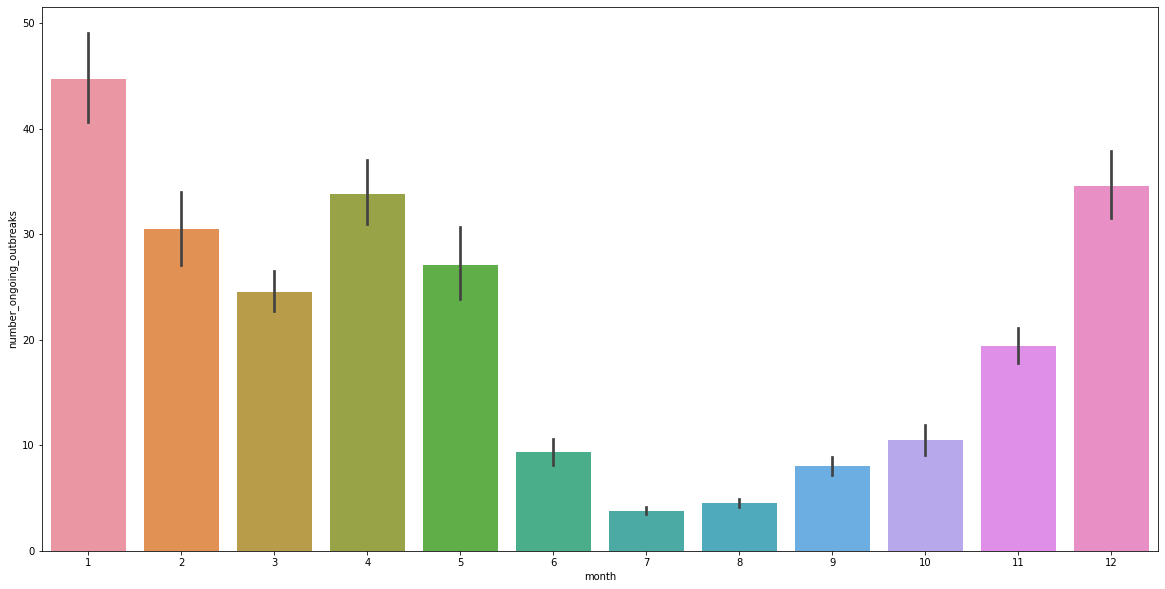

In [98]:

plt.figure(figsize=(20,10))
plot = sns.barplot(df['month'], df['number_ongoing_outbreaks'])

In [99]:
fig = px.area(df, x="month", y="number_ongoing_outbreaks")
fig.show()

In [100]:
#Cases outbreak datewise
fig = px.area(df, x="date", y="number_ongoing_outbreaks")
fig.show()

## Insight-4 - Cases outbreak in 2020 and 2021.

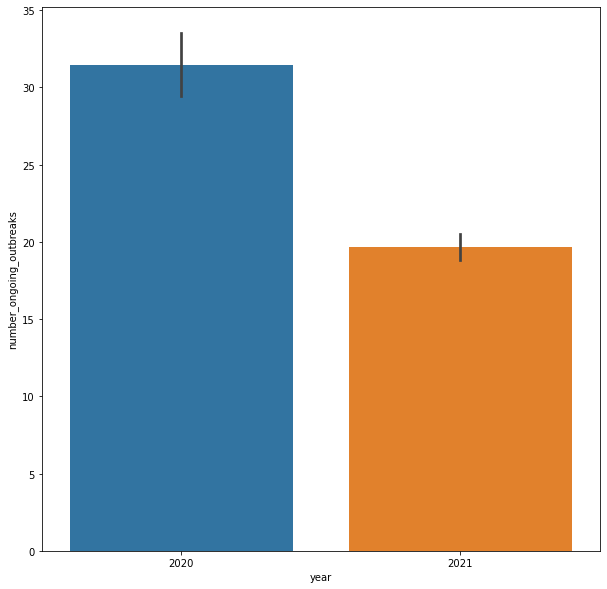

In [101]:
plt.figure(figsize=(10,10))
plot = sns.barplot(df['year'], df['number_ongoing_outbreaks'])

## Insight-5 - Total no of ongoing cases.

In [102]:
#Total outgoing cases
df['number_ongoing_outbreaks'].sum()

192375

In [103]:
df['outbreak_group'].value_counts(ascending=True)

7 Out of Province Outbreak      62
6 Other/Unknown                763
1 Congregate Care             1182
5 Recreational                1366
3 Education                   1797
2 Congregate Living           1820
4 Workplace                   1933
Name: outbreak_group, dtype: int64


### Insights
#### 1. Maximum no of cases outbreaked in Congregate care whereas the minimum no of outbreaks experienced out of province.
#### 2. Maximum no of cases in province was in workplaces where very less cases recorded from caming areas and out of province.
#### 3. Maximum cases recorded were in Month of January whereas July was the month with least no of outbreaks.
#### 4. No of outbreaks in 2020 were more as compared to 2021.
#### 5. Total no of outbreaks are 192375
#### 6. July 28 2021 expericed just 6 cases.
#### 7. 261 was the maximum no of outbreaks experienced on January 2021 

